In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 33s 0us/step


In [4]:
print(f'#traning = {X_train.shape[0]}')
print(f'#test = {X_test.shape[0]}')

#traning = 50000
#test = 10000


In [5]:
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

X_train: (50000, 32, 32, 3)
y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


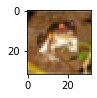

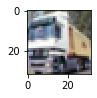

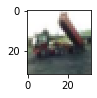

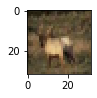

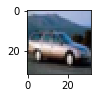

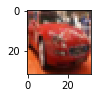

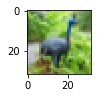

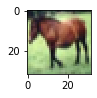

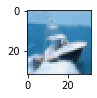

In [6]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [7]:
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

In [8]:
NUM_ROWS = 32
NUM_COLS = 32
NUM_CLASSES = 10

In [10]:
X_train = X_train.reshape((X_train.shape[0],  NUM_ROWS, NUM_COLS, 3))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS, NUM_COLS, 3))
X_test = X_test.astype('float32') / 255

In [11]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(NUM_ROWS, NUM_COLS, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [13]:
Tenclass_Model = model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 1.8068 - accuracy: 0.3354 - val_loss: 1.3963 - val_accuracy: 0.5038
Epoch 2/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.4015 - accuracy: 0.4984 - val_loss: 1.2411 - val_accuracy: 0.5513
Epoch 3/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.2113 - accuracy: 0.5725 - val_loss: 1.1141 - val_accuracy: 0.6028
Epoch 4/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.0867 - accuracy: 0.6174 - val_loss: 1.1462 - val_accuracy: 0.5975
Epoch 5/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.9968 - accuracy: 0.6508 - val_loss: 0.9417 - val_accuracy: 0.6748
Epoch 6/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.9311 - accuracy: 0.6766 - val_loss: 1.0276 - val_accuracy: 0.6424
Epoch 7/10
50000/50000 [==============================] 

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8848145295143127
Test accuracy: 0.6969


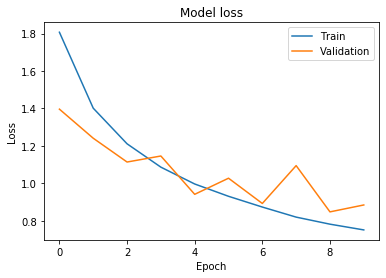

In [16]:
plt.plot(Tenclass_Model.history['loss'])
plt.plot(Tenclass_Model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

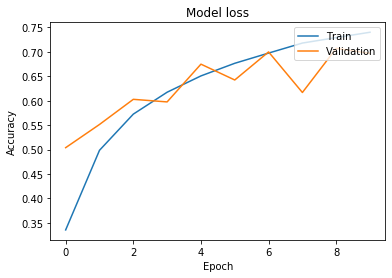

In [17]:
plt.plot(Tenclass_Model.history['accuracy'])
plt.plot(Tenclass_Model.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()